## Libraries

In [2]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from datetime import date,timedelta
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm

import matplotlib.pyplot as plt
import pandas as pd

from pandas import DataFrame
from matplotlib import pyplot

import itertools
import numpy as np
from pandas import read_excel
import matplotlib
import datetime as dt


## Dates used in project

In [3]:
today = date.today() 
print("Today date is: ", today)
tomorrow = today + timedelta(days=1)
tomorrow_string = str(tomorrow)
print("tomorrow date is: ", tomorrow)
print("to string : " , tomorrow_string)
print(type(tomorrow_string))
next_week_begin = today + timedelta(days=7)
print("Next week is :", next_week_begin)
next_week_end = next_week_begin + timedelta(days=7)
print("End next week is :", next_week_end)

Today date is:  2021-01-14
tomorrow date is:  2021-01-15
to string :  2021-01-15
<class 'str'>
Next week is : 2021-01-21
End next week is : 2021-01-28


## Loading of the the dataset

In [4]:
data = pd.read_excel('WindForecast_20210112-20210118.xls' , header = None  ,index_col= False )
data = data.iloc[4:]
data.columns = ['DateTime','Week-ahead Forecast [MW]','Day-ahead forecast [MW]' , 'Most recent forecast [MW]','Measured & upscaled [MW]','Monitored Capacity [MW]','Active Decremental Bids [yes/no]' ,'Day-ahead forecast(11h00) [MW]']
data['DateTime'] = pd.to_datetime(data['DateTime'])

# EDA : Exploratory Data Analysis

In [5]:
data.head()

,DateTime,Week-ahead Forecast [MW],Day-ahead forecast [MW],Most recent forecast [MW],Measured & upscaled [MW],Monitored Capacity [MW],Active Decremental Bids [yes/no],Day-ahead forecast(11h00) [MW]
4,2021-12-01 00:00:00,1466.06,3558.2,3536.08,3390.06,4670.83,No,3508.03
5,2021-12-01 00:15:00,1510.05,3566.38,3544.98,3433.99,4670.83,No,3518.98
6,2021-12-01 00:30:00,1442.41,3572.99,3554,3482.05,4670.83,No,3527.87
7,2021-12-01 00:45:00,1458.09,3578.06,3562.79,3486.22,4670.83,No,3535.23
8,2021-12-01 01:00:00,1493.55,3580.62,3501.62,3498.25,4670.83,No,3540.6


In [6]:
data.describe()

<ipython-input-6-2bb0b18689d4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,DateTime,Week-ahead Forecast [MW],Day-ahead forecast [MW],Most recent forecast [MW],Measured & upscaled [MW],Monitored Capacity [MW],Active Decremental Bids [yes/no],Day-ahead forecast(11h00) [MW]
count,672,672.00,288.00,672.00,252.00,672.000,672,384.00
unique,672,668.00,288.00,671.00,252.00,1.000,1,384.00
top,2021-01-17 01:15:00,2136.02,625.05,2035.69,1534.96,4670.829,No,3583.96
freq,1,2.00,1.00,2.00,1.00,672.000,672,1.00
first,2021-01-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-01 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# From the information above you see that all the data is normalized between -1.0 and 1.0
# Check the datatypes used in this dataset
data.dtypes.value_counts()

object            7
datetime64[ns]    1
dtype: int64

In [8]:
# Show the last 5 datatypes
data.dtypes.tail()

Most recent forecast [MW]           object
Measured & upscaled [MW]            object
Monitored Capacity [MW]             object
Active Decremental Bids [yes/no]    object
Day-ahead forecast(11h00) [MW]      object
dtype: object

### Changing dataset for DateTime Index

In [9]:
data.to_csv('Windforcast.csv' , index = False)
df = pd.read_csv('Windforcast.csv')


In [10]:
df.set_index('DateTime',inplace=True)
df.index = pd.DatetimeIndex(df.index).to_period('H');
df = df[~df.index.duplicated()]

In [11]:
df.head()

,Week-ahead Forecast [MW],Day-ahead forecast [MW],Most recent forecast [MW],Measured & upscaled [MW],Monitored Capacity [MW],Active Decremental Bids [yes/no],Day-ahead forecast(11h00) [MW]
DateTime,,,,,,,
2021-12-01 00:00,1466.06,3558.20,3536.08,3390.06,4670.829,No,3508.03
2021-12-01 01:00,1493.55,3580.62,3501.62,3498.25,4670.829,No,3540.60
2021-12-01 02:00,1597.20,3586.57,3536.58,3531.04,4670.829,No,3548.69
2021-12-01 03:00,1684.34,3593.28,3616.85,3578.76,4670.829,No,3562.67
2021-12-01 04:00,1689.73,3592.74,3649.54,3632.46,4670.829,No,3581.01


# AMIRA MODEL

### Building of ARIMA model step by step

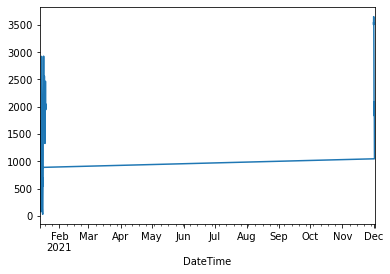

In [12]:
df['Most recent forecast [MW]'].plot()


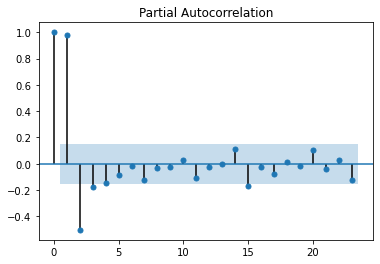

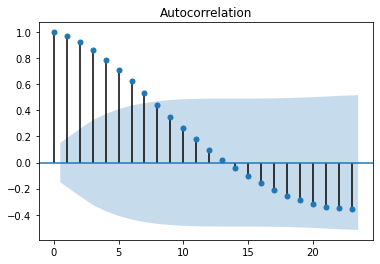

In [13]:
plot_pacf(df['Most recent forecast [MW]']);
plot_acf(df['Most recent forecast [MW]']);

In [14]:
ad_fuller_result = adfuller(df['Most recent forecast [MW]'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
print(type(df)) #data is not stationary, value goes above 0.05


ADF Statistic: -2.897822928678228
p-value: 0.045601747590909
<class 'pandas.core.frame.DataFrame'>


In [15]:
df['First Difference']=   df['Most recent forecast [MW]']-df['Most recent forecast [MW]'].shift(1)
ad_fuller_result = adfuller(df['Most recent forecast [MW]'].dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
print(type(df))  #data is stationary


ADF Statistic: -2.897822928678228
p-value: 0.045601747590909
<class 'pandas.core.frame.DataFrame'>


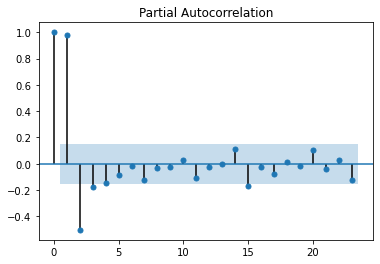

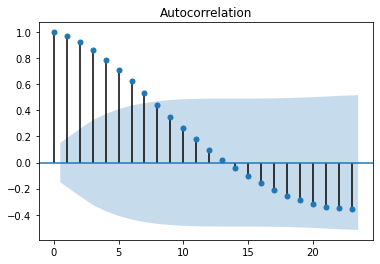

In [16]:
plot_pacf(df['Most recent forecast [MW]'].dropna());
plot_acf(df['Most recent forecast [MW]'].dropna());

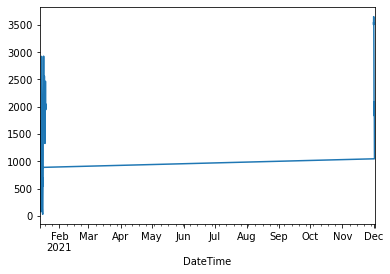

In [17]:
df['Most recent forecast [MW]'].plot()

In [18]:
import math

count_rows = df['Most recent forecast [MW]'].count()
train_length = round((count_rows / 100)*75)
test_length = round((count_rows / 100)*25)

print(train_length)
print(test_length)

126
42


In [19]:
train = df['Most recent forecast [MW]'].dropna().iloc[0:train_length]  # making of train dataset
test = df['Most recent forecast [MW]'].dropna().iloc[train_length:]   # making of test dataset

count_rows_train = train.count()
count_rows_test = test.count()

print(count_rows_train)
print(count_rows_test)

126
42


In [20]:
import pmdarima as pmd 

def arimamodel(anArray):
    autoarima_model = pmd.auto_arima(anArray , start_p = 0, start_q = 0, test = "adf")
    return autoarima_model

arima_model = arimamodel(train) # train model and add best combination p,d and q value
arima_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  126
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -801.363
Date:                Thu, 14 Jan 2021   AIC                           1606.725
Time:                        17:49:56   BIC                           1612.382
Sample:                             0   HQIC                          1609.023
                                - 126                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6299      0.042     14.866      0.000       0.547       0.713
sigma2       2.17e+04   1666.509     13.021      0.000    1.84e+04     2.5e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                98.31
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             1.01
Prob(H) (two-sided):                  0.89   Kurtosis:                         6.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Training Data ARIMA model

In [21]:
model = sm.tsa.ARIMA(train, order=(1,0,0)).fit()

predictions = model.predict(0)
print(predictions)
    
count_rows_predictions = predictions.count()
print(count_rows_predictions)


C:\Users\glen_\anaconda3\envs\SmartSystem\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\glen_\anaconda3\envs\SmartSystem\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, 

DateTime
2021-12-01 00:00    2253.982288
2021-12-01 01:00    3518.136689
2021-12-01 02:00    3484.158967
2021-12-01 03:00    3518.629692
2021-12-01 04:00    3597.776291
                       ...     
2021-01-17 01:00    2187.858555
2021-01-17 02:00    2176.056079
2021-01-17 03:00    2122.663923
2021-01-17 04:00    2071.095876
2021-01-17 05:00    2056.473426
Freq: H, Length: 126, dtype: float64
126


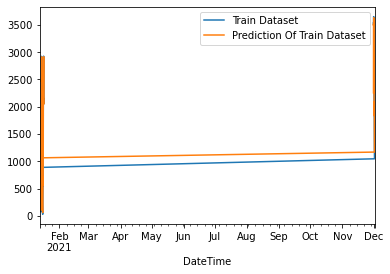

In [22]:
train.plot(label = "Train Dataset" , legend = True)
predictions.plot(label = "Prediction Of Train Dataset", legend = True)

### Plotting tommorrow

In [23]:
Tommorow_pred = model.predict(start = today , end = tomorrow )
print(Tommorow_pred)


DateTime
2021-01-14 00:00     420.731028
2021-01-14 01:00     297.026875
2021-01-14 02:00     205.141095
2021-01-14 03:00     136.248945
2021-01-14 04:00     105.623638
2021-01-14 05:00     130.520257
2021-01-14 06:00     132.610587
2021-01-14 07:00     626.243992
2021-01-14 08:00    1515.531514
2021-01-14 09:00    1741.543517
2021-01-14 10:00    1847.499584
2021-01-14 11:00    2147.698583
2021-01-14 12:00    2319.904308
2021-01-14 13:00    2408.171451
2021-01-14 14:00    2472.616720
2021-01-14 15:00    2462.243950
2021-01-14 16:00    2520.763330
2021-01-14 17:00    2676.887318
2021-01-14 18:00    2800.966153
2021-01-14 19:00    2859.317913
2021-01-14 20:00    2912.611468
2021-01-14 21:00    2865.352262
2021-01-14 22:00    2823.634402
2021-01-14 23:00    2782.034862
2021-01-15 00:00    2660.549220
Freq: H, dtype: float64


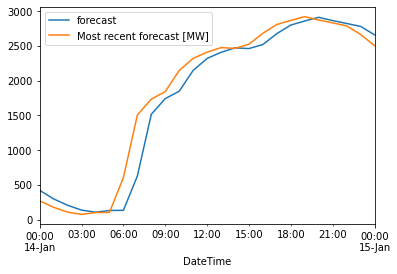

In [24]:
res_Tomorrow = model.plot_predict(start = today , end = tomorrow)

### Plotting next week

In [25]:
Next_Week_pred =  model.predict(start = today , end = next_week_begin)

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

In [ ]:
res_nextweek = model.plot_predict(start = today , end = next_week_begin)

## Regression Evaluation Metrics ARIMA
 

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(train , predictions)) # Mean Absolute Error
print('MSE:', metrics.mean_squared_error(train , predictions))  # Mean Squared Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(train , predictions)))  # Sqaure root Mean Squared Error

# values are not good


## Deploy ARIMA

In [ ]:
import pickle
pickle.dump(model, open('ARIMA.pkl','wb'))